In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline



In [4]:
df = pd.read_csv('D:\jupyter\projects\data\healthcare-dataset-stroke-data.csv')

In [5]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


---

In [6]:
stroke = df[df['stroke']==1]

In [7]:
len(stroke)

249

In [8]:
normal = df[df['stroke']==0]

In [9]:
len(normal)

4860

--- 

#### Describe the numerical data ?

In [10]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5109.000000,5109.000000,5109.000000,5109.000000,4908.00000,5109.000000
mean,43.229986,0.097475,0.054022,106.140399,28.89456,0.048738
std,22.613575,0.296633,0.226084,45.285004,7.85432,0.215340
min,0.080000,0.000000,0.000000,55.120000,10.30000,0.000000
25%,25.000000,0.000000,0.000000,77.240000,23.50000,0.000000
50%,45.000000,0.000000,0.000000,91.880000,28.10000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.10000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.60000,1.000000


#### What are the unique values are in each categorical column (alphabets)?

In [11]:
def unique(df,a,b,c,d,e,f):
        print(df[a].unique())
        print(df[b].unique())
        print(df[c].unique())
        print(df[d].unique())
        print(df[e].unique())
        print(df[f].unique())
        
        
unique(df,'gender','ever_married','work_type','Residence_type','smoking_status','stroke')
    
    

['Male' 'Female']
['Yes' 'No']
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
['Urban' 'Rural']
['formerly smoked' 'never smoked' 'smokes' 'Unknown']
[1 0]


### Q: How many missing values are there in each column ?

In [12]:
# can also check with 
# df.isna().sum

In [13]:
print(df.isnull().sum())

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


#### Fill missing bmi values

In [14]:
median_bmi = df["bmi"].median()

df['bmi'].fillna(median_bmi, inplace=True)

### Q: How many positive values of stroke are there ?

In [15]:
df['stroke'].value_counts()

0    4860
1     249
Name: stroke, dtype: int64

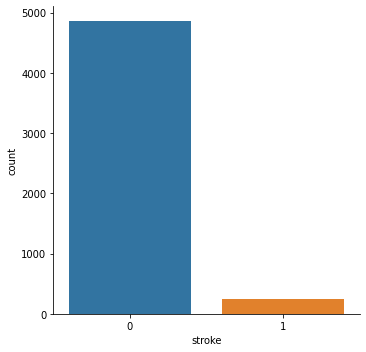

In [16]:
sns.catplot(
    data=df,
    x="stroke",
    kind="count",
    margin_titles=True

)

In [17]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


#### Histograms from HO book

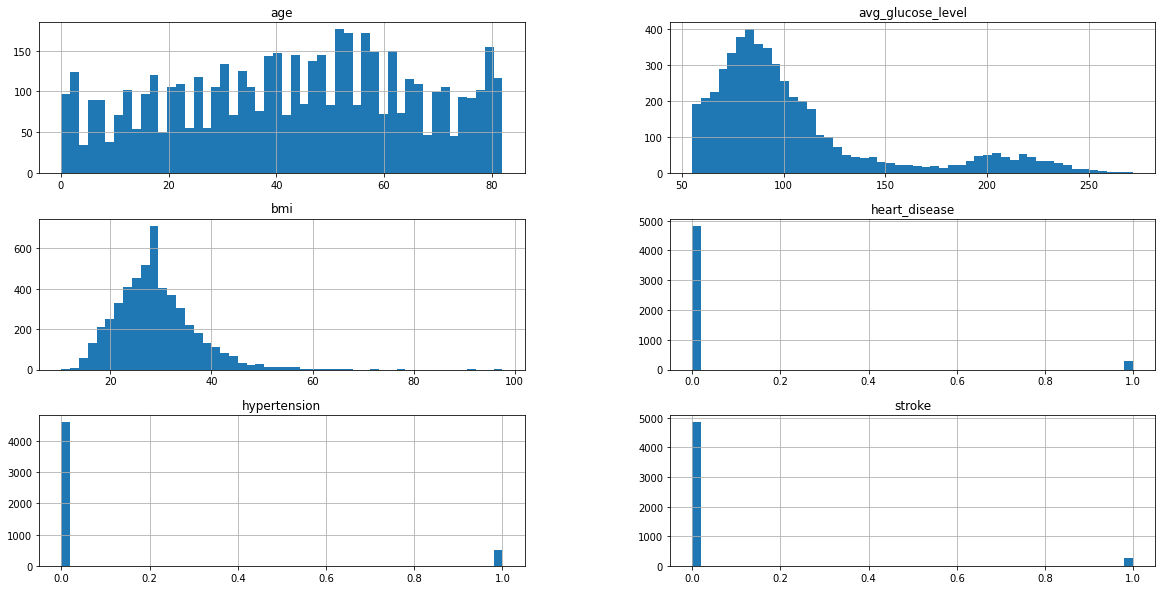

In [18]:
# histograms of stroke = True

%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,10))
#save_fig("attribute_histogram_plots")
plt.show()

--- 

## Convert all numberical values into categories

#### Converting average glucose values into categories

<AxesSubplot:>

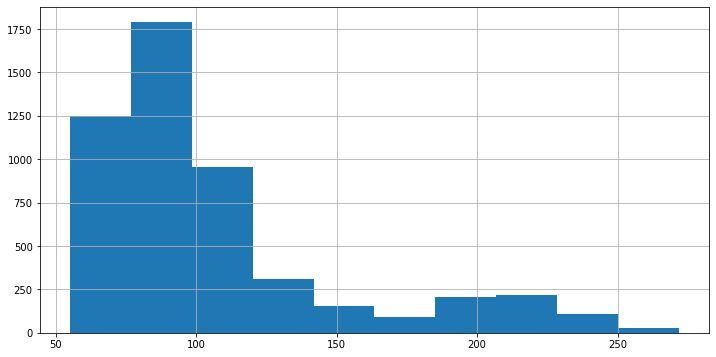

In [19]:
df["avg_glucose_level"].hist(figsize=(12,6))


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,bmi,smoking_status,stroke,avg_glucose_cat
0,Male,67.0,0,1,Yes,Private,Urban,36.6,formerly smoked,1,4
1,Female,61.0,0,0,Yes,Self-employed,Rural,28.1,never smoked,1,3
2,Male,80.0,0,1,Yes,Private,Rural,32.5,never smoked,1,2
3,Female,49.0,0,0,Yes,Private,Urban,34.4,smokes,1,3
4,Female,79.0,1,0,Yes,Self-employed,Rural,24.0,never smoked,1,3


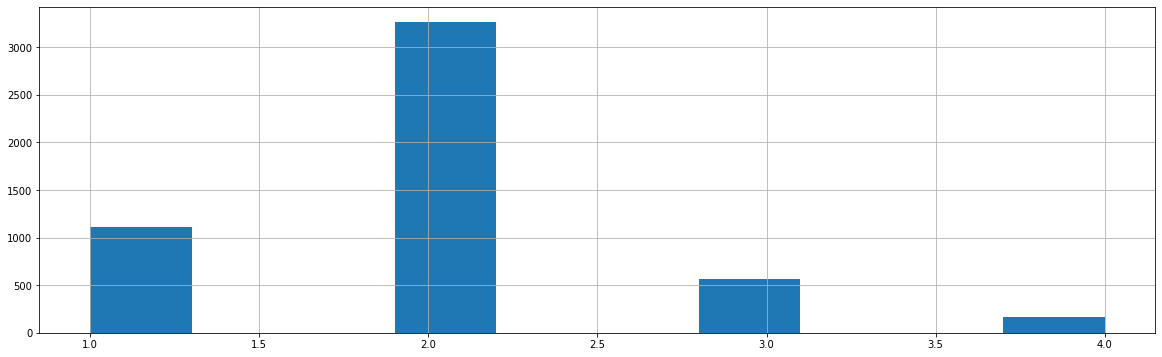

In [20]:
df["avg_glucose_cat"] = pd.cut(df["avg_glucose_level"],
                               bins=[0 , 75, 150, 225, 300, np.inf],
                               labels=[1, 2, 3, 4, 5])

df["avg_glucose_cat"].hist(figsize=(20,6))
df.drop('avg_glucose_level', axis=1, inplace=True)
df.head()

### Converting average bmi into categories

<AxesSubplot:>

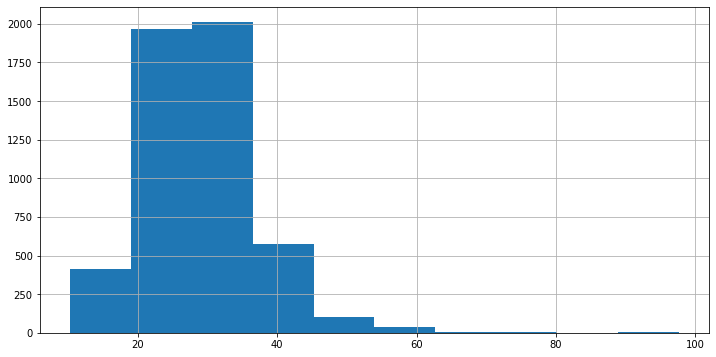

In [21]:
df["bmi"].hist(figsize=(12,6))

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,stroke,avg_glucose_cat,bmi_cat
0,Male,67.0,0,1,Yes,Private,Urban,formerly smoked,1,4,2
1,Female,61.0,0,0,Yes,Self-employed,Rural,never smoked,1,3,2
2,Male,80.0,0,1,Yes,Private,Rural,never smoked,1,2,2
3,Female,49.0,0,0,Yes,Private,Urban,smokes,1,3,2
4,Female,79.0,1,0,Yes,Self-employed,Rural,never smoked,1,3,2


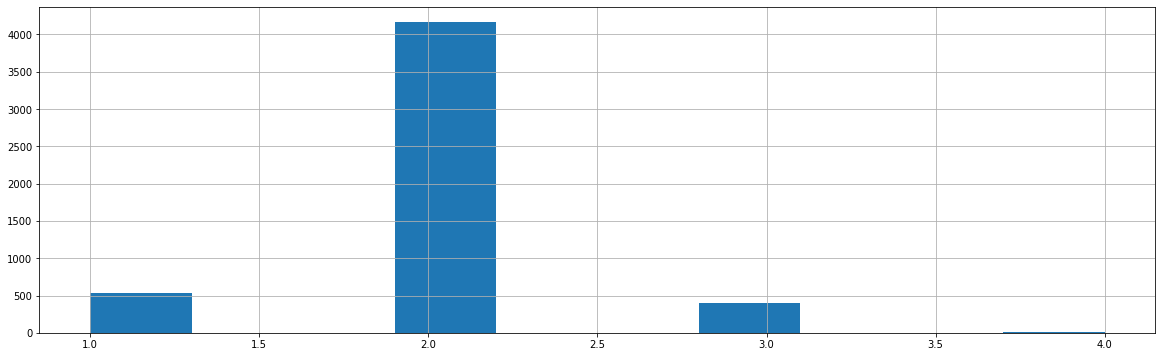

In [22]:
df["bmi_cat"] = pd.cut(df["bmi"],
                               bins=[0 , 20, 40, 60, np.inf],
                               labels=[1, 2, 3, 4])

df["bmi_cat"].hist(figsize=(20,6))
df.drop('bmi', axis=1, inplace=True)
df.head()

### Converting age into categories

<AxesSubplot:>

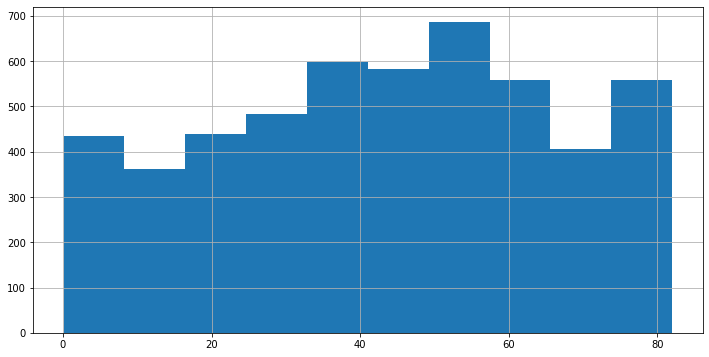

In [23]:
df["age"].hist(figsize=(12,6))

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,stroke,avg_glucose_cat,bmi_cat,age_cat
0,Male,0,1,Yes,Private,Urban,formerly smoked,1,4,2,4
1,Female,0,0,Yes,Self-employed,Rural,never smoked,1,3,2,4
2,Male,0,1,Yes,Private,Rural,never smoked,1,2,2,4
3,Female,0,0,Yes,Private,Urban,smokes,1,3,2,3
4,Female,1,0,Yes,Self-employed,Rural,never smoked,1,3,2,4


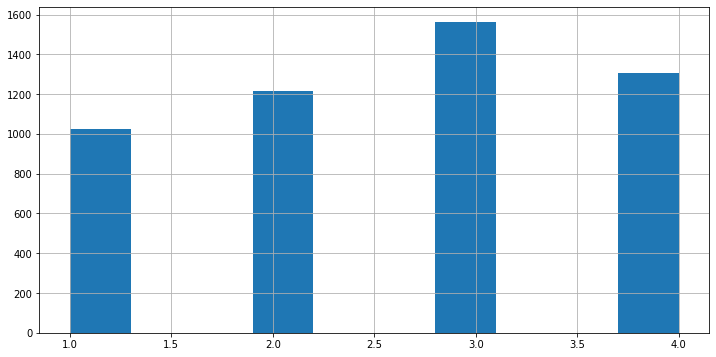

In [24]:
df["age_cat"] = pd.cut(df["age"],
                               bins=[0 , 20, 40, 60, np.inf],
                               labels=[1, 2, 3, 4])
df["age_cat"].hist(figsize=(12,6))

df.drop('age', axis=1, inplace=True)
df.head()

#### What are the unique values in the text columns ?

In [25]:
def unique(df,a,b,c,d,e):
        print(df[a].unique())
        print(df[b].unique())
        print(df[c].unique())
        print(df[d].unique())
        print(df[e].unique())
        
        
unique(df,'gender','ever_married','work_type','Residence_type','smoking_status')

['Male' 'Female']
['Yes' 'No']
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
['Urban' 'Rural']
['formerly smoked' 'never smoked' 'smokes' 'Unknown']


### Splitting the data into Testing, Training and Validation Sets

In [26]:
from sklearn.model_selection import StratifiedShuffleSplit


In [27]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_valid_index in split.split(df, df.stroke):
    strat_train_set = df.iloc[train_index]
    strat_test_valid_set = df.iloc[test_valid_index]



In [28]:
split2 = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=42)

for test_index, valid_index in split2.split(strat_test_valid_set, strat_test_valid_set.stroke):
    strat_test_set = strat_test_valid_set.iloc[test_index]
    valid_set = strat_test_valid_set.iloc[valid_index]

In [29]:
df.shape

(5109, 11)

#### This is the Training set

In [30]:
strat_train_set.shape


(4087, 11)

#### This is the first Testing set

In [31]:
strat_test_set.shape

(511, 11)

#### This is the 2nd testing set; here called validation set

In [32]:
valid_set.shape

(511, 11)

#### Converting now back to the old/known conventions for ease at this point, making X_train, X_test, y_train, and y_test sets

In [33]:
X_train = strat_train_set.drop('stroke', axis='columns')

In [34]:
X_train.head(2)

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,avg_glucose_cat,bmi_cat,age_cat
845,Female,0,0,Yes,Private,Urban,never smoked,1,2,3
3744,Female,0,0,No,Private,Urban,never smoked,2,2,2


In [35]:
y_train = strat_train_set['stroke']
y_train.head(2)

845     0
3744    0
Name: stroke, dtype: int64

In [36]:
len(X_train),len(y_train)

(4087, 4087)

In [37]:
X_test = strat_test_set.drop('stroke', axis='columns')

In [38]:
X_test.head(2)

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,avg_glucose_cat,bmi_cat,age_cat
3094,Male,0,0,No,children,Urban,Unknown,2,2,1
1229,Male,0,0,Yes,Self-employed,Rural,formerly smoked,2,2,3


In [39]:
y_test = strat_test_set['stroke']

In [40]:
len(X_test),len(y_test)

(511, 511)

In [41]:
z_test = valid_set['stroke']

In [42]:
z_train = valid_set.drop('stroke', axis='columns')

In [43]:
len(z_train),len(z_test)

(511, 511)

In [44]:
X_train.head()

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,avg_glucose_cat,bmi_cat,age_cat
845,Female,0,0,Yes,Private,Urban,never smoked,1,2,3
3744,Female,0,0,No,Private,Urban,never smoked,2,2,2
4183,Female,0,0,Yes,Private,Rural,never smoked,2,2,2
3409,Male,0,0,Yes,Private,Rural,never smoked,2,2,2
284,Male,0,0,No,Govt_job,Urban,Unknown,2,2,1


#### SMOTE not working / Using RandomOverSampler to make X_train and y_train values 

In [49]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler

In [51]:
os =  RandomOverSampler()

In [53]:
X_train_res, y_train_res = os.fit_sample(X_train, y_train)

In [54]:
X_train = X_train_res
y_train = y_train_res

In [56]:
X_train.shape

(7776, 10)

In [57]:
y_train.shape

(7776,)

#### One Hot Encoder

In [91]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

In [92]:
from sklearn.compose import make_column_transformer

In [93]:

column_trans = make_column_transformer(
    (OneHotEncoder(),['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'avg_glucose_cat',
                    'bmi_cat', 'age_cat']),
    remainder='passthrough')


In [94]:
column_trans.fit_transform(X_train)

array([[1., 0., 1., ..., 0., 1., 0.],
       [1., 0., 1., ..., 1., 0., 0.],
       [1., 0., 1., ..., 1., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 1.],
       [0., 1., 1., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 1.]])

In [102]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

logreg = LogisticRegression(max_iter=20000)


In [103]:
pipe = make_pipeline(column_trans, logreg)

In [104]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['gender', 'hypertension',
                                                   'heart_disease',
                                                   'ever_married', 'work_type',
                                                   'Residence_type',
                                                   'smoking_status',
                                                   'avg_glucose_cat', 'bmi_cat',
                                                   'age_cat'])])),
                ('logisticregression', LogisticRegression(max_iter=20000))])

we have X_test and y_test to predict now

In [105]:
pipe.predict(X_test)

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,

In [ ]:
# From Documentation of Scikit Learn

numeric_features = ['age', 'fare']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['embarked', 'sex', 'pclass']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression())])

### Confusion Matrix

In [106]:
y_predicted = pipe.predict(X_test)

In [107]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[324, 162],
       [  3,  22]], dtype=int64)

Text(69.0, 0.5, 'Truth')

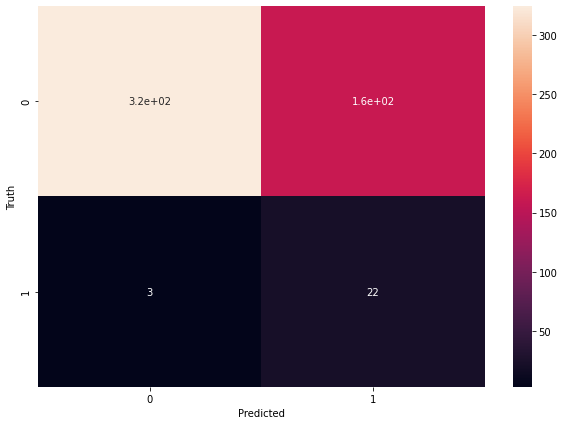

In [108]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)